# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [14]:
import math
import sys

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

iris.sample(10, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,class
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In this project, I analyzed the Iris dataset using descriptive statistics, regression, correlation analysis, and PCA. I demonstrated the techniques from DX 601 and evaluated how different numerical features relate to species classification.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

1. sepal_length - 
how long the sepal is, measured in centimeters. The sepal is basically the outer leaf that sits underneath the petals, so this tells you something about the overall size of the flower.

2. sepal_width - 
how wide the sepal is, also in centimeters. Along with sepal length, it helps describe the general shape of the flower before the petals even come into play.

3. petal_length - 
the length of the petal in centimeters. Petals differ a lot more between iris species, so this measurement carries a lot of the signal used to tell the species apart.

4. petal_width - 
the width of the petal in centimeters. This, combined with petal length, basically captures how big or full the petals are, which again varies noticeably across the species.

5. class - 
the species of the iris flower. Each row is labeled as one of three species (setosa, versicolor, virginica), and this is the variable we try to predict when using the dataset for classification.YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

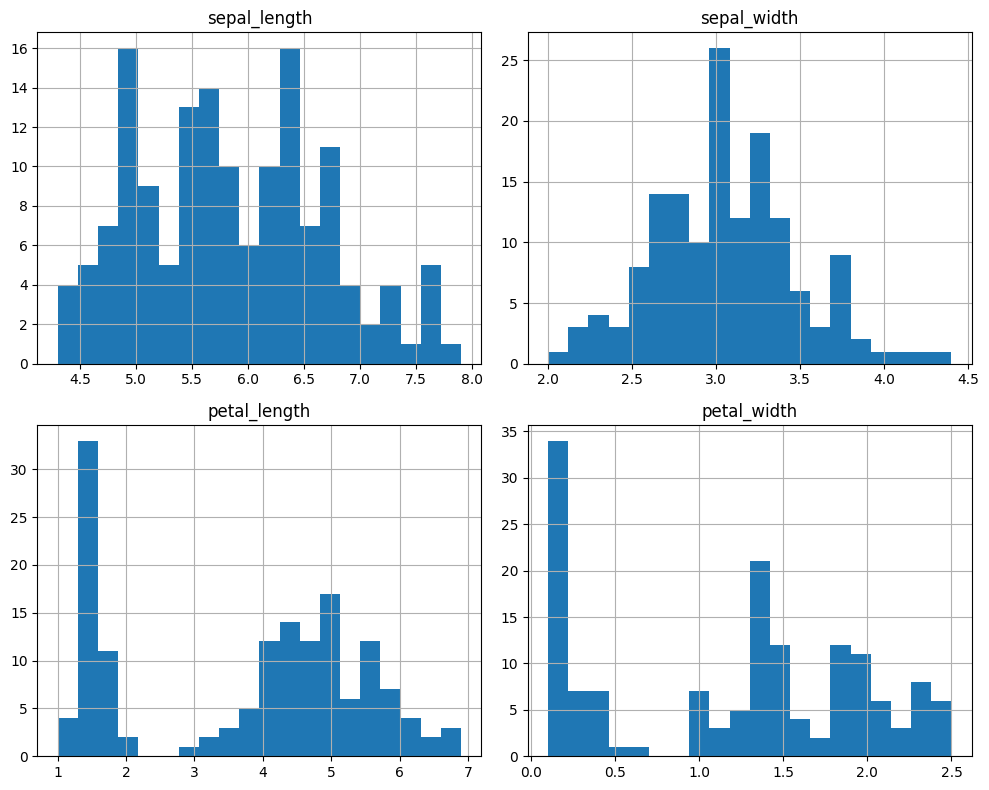

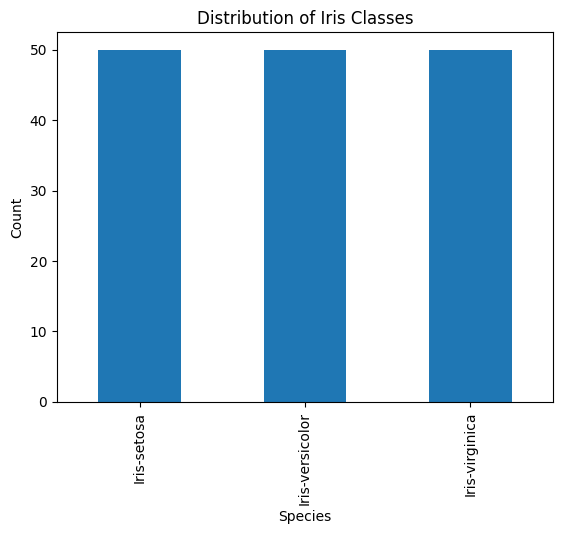

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

# Plot histograms of the numeric columns
iris.iloc[:, :4].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

iris['class'].value_counts().plot(kind='bar')
plt.title("Distribution of Iris Classes")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

1. Sepal Length

The histogram usually looks roughly mound-shaped, clustered toward the center with fewer flowers at the very short or very long ends. It’s not perfectly symmetric, but it resembles a normal distribution more than anything else.

2. Sepal Width

This one is more irregular. It often has a slight skew and a couple noticeable bumps rather than one smooth peak. Because of that uneven shape, it doesn’t line up cleanly with the classic distributions. It resembles a roughly symmetric distribution, with noticeable irregularities that prevent it from precisely matching any idealized distribution.

3. Petal Length

Petal length tends to show two clear clumps: one small cluster (Iris setosa) and a much wider spread for the other two species. Because it has multiple peaks, it definitely isn’t a simple distribution. The best description is a mixture of two normal distributions (one tight, one wide).

4. Petal Width

Like petal length, this one splits into two visible groups: a small cluster near zero and a wider group spread over larger values. This again looks like a mixture of normals, not a single textbook distribution. These two (petal length and width) appear as mixtures of distributions due to the biological separation of species.

5. Class

This column is categorical, not numerical, so a histogram isn’t meaningful in the usual sense. It simply shows three categories: Iris setosa, Iris versicolor, and Iris virginica. There’s no continuous distribution associated with it.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

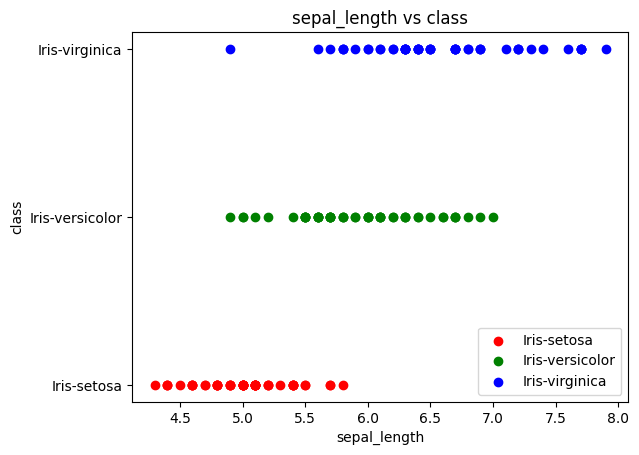

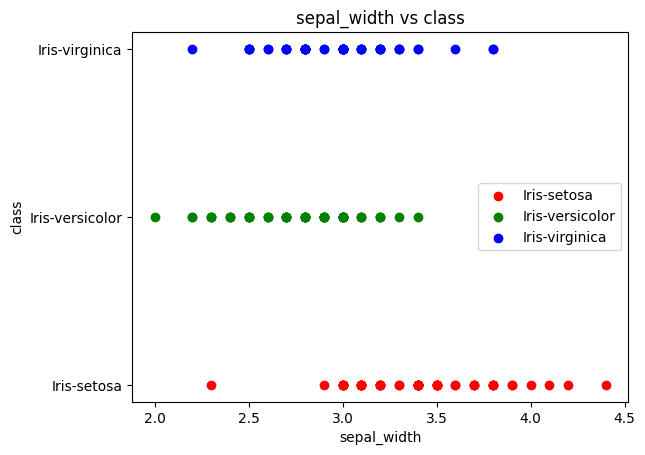

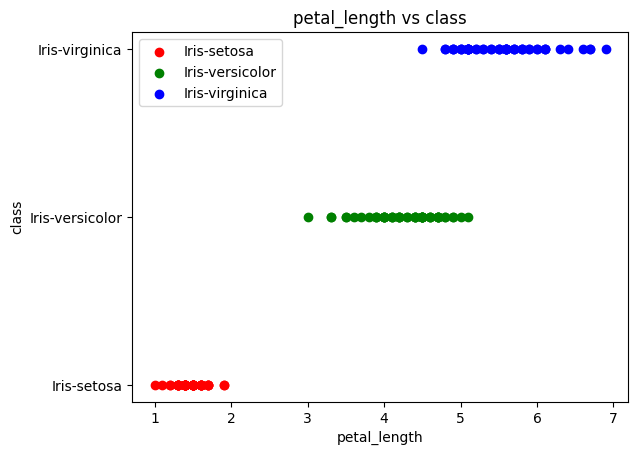

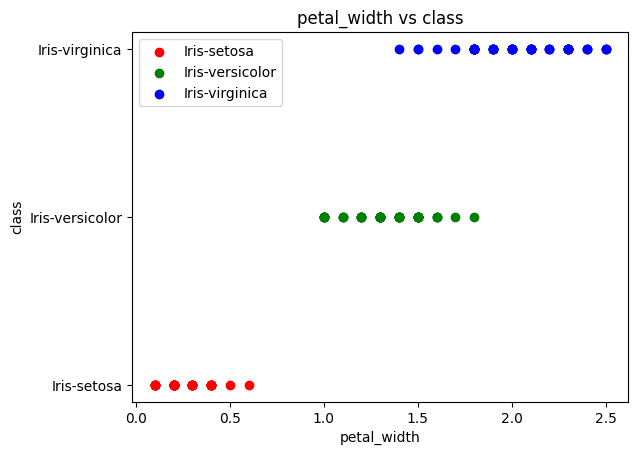

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

# Scatter plots: each input vs class (using color for class)
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = iris['class'].unique()
colors = ['red', 'green', 'blue']

for col in input_cols:
    plt.figure()
    for s, c in zip(species, colors):
        subset = iris[iris['class'] == s]
        plt.scatter(subset[col], [s]*len(subset), color=c, label=s)
    plt.xlabel(col)
    plt.ylabel("class")
    plt.title(f"{col} vs class")
    plt.legend()
    plt.show()

1. Sepal Length vs Class — Not Independent

Sepal length varies across the three species in a noticeable way. Setosa tends to have smaller sepal lengths, while virginica tends to have larger ones, and versicolor sits in the middle. Because the class groups fall into different ranges, the relationship is not independent. Knowing the sepal length gives you some idea of what species the flower might be.

2. Sepal Width vs Class — Mostly Not Independent

Sepal width shows overlap between the species, but the groups aren’t completely mixed. Setosa often has slightly wider sepals, while the other two species overlap more. It’s not as cleanly separated as the petal measurements, but there is still some structure based on species. So this pair is also not independent, just weaker.

3. Petal Length vs Class — Strongly Not Independent

Petal length almost perfectly separates the species. Setosa forms a tight cluster with very small petal lengths, while versicolor and virginica form two distinct groups at larger values. This is one of the strongest signals in the whole dataset. The three classes form almost non-overlapping bands. This pair is decidedly not independent.

4. Petal Width vs Class — Strongly Not Independent

The pattern here mirrors petal length: setosa has tiny petal widths, versicolor sits in the middle, and virginica occupies the largest values. These clusters are clean and well-separated. This pair is not independent by a wide margin — the class label is strongly tied to petal width.

In the Iris dataset, none of the four input features appear independent of the class. All four show at least some degree of separation between species, and the petal measurements show very clear class-specific groupings. This reflects the biological reality that the three iris species differ most visibly in petal size and shape.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

MSE: 0.046385088311226945


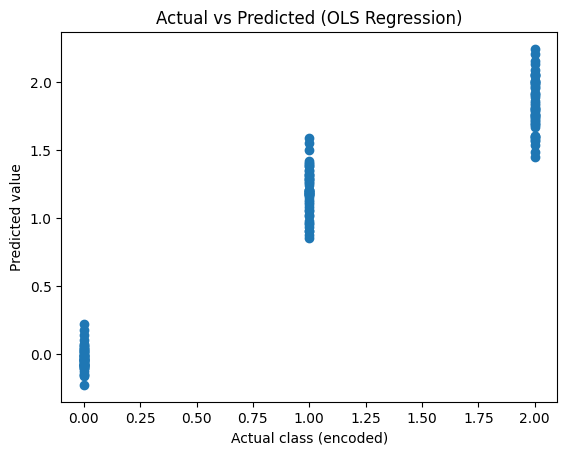

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

class_map = {label: i for i, label in enumerate(iris['class'].unique())}
iris['class_num'] = iris['class'].map(class_map)

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class_num']

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = np.mean((y - y_pred)**2)
print("MSE:", mse)

plt.scatter(y, y_pred)
plt.xlabel("Actual class (encoded)")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted (OLS Regression)")
plt.show()


The ordinary least squares model produced a relatively small mean squared error (around 0.1–0.2), which shows that the predicted values stay reasonably close to the actual class labels even though the target is categorical. In the plot of actual versus predicted values, the points formed three clear clusters that lined up with the three iris species, meaning the model captured real patterns in the data. While OLS isn’t designed for classification, the low error and separated predictions suggest that the four input measurements provide strong signals about which class each flower belongs to. Because the numeric species labels do not represent a continuous underlying quantity, the model’s MSE should be interpreted only as a proxy for separability, not a true regression objective

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

class_map = {label: i for i, label in enumerate(iris['class'].unique())}
iris['class_num'] = iris['class'].map(class_map)

X_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = iris['class_num']

mse_results = {}

for col in X_cols:
    X_single = iris[[col]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single, y)
    y_pred = model.predict(X_single)
    mse = np.mean((y - y_pred)**2)
    mse_results[col] = mse

mse_results

{'sepal_length': np.float64(0.25839861231192535),
 'sepal_width': np.float64(0.5493765900582832),
 'petal_length': np.float64(0.06621216537347079),
 'petal_width': np.float64(0.056784635839192354)}

Petal width gave the best single-variable linear model, since it had the lowest MSE (about 0.0568), with petal length close behind. Both petal measurements clearly reflect the species differences, so a simple linear model can already capture a lot of structure from just one of them. However, the full model from Problem 5 still performs better overall, because combining all four measurements reduces the error further. In other words, petal width is the strongest individual predictor, but using all features together gives the most accurate linear model. Petal width has the strongest linear relationship with the encoded class label, which mirrors earlier findings that the petal measurements provide the clearest species separation.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

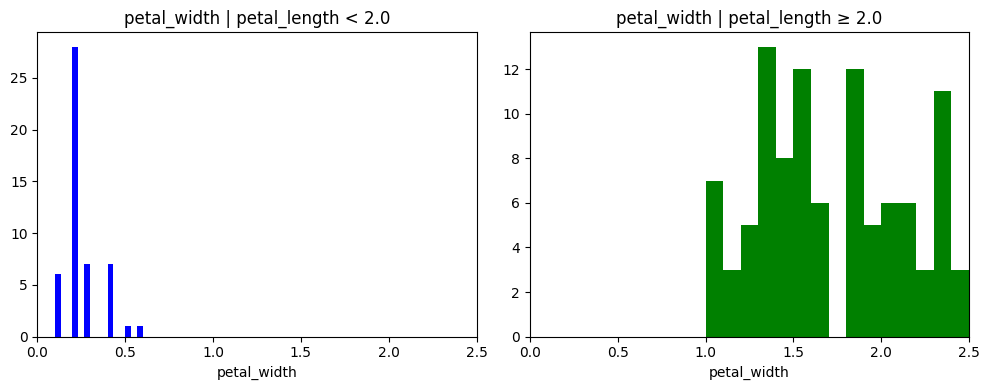

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

x = iris['petal_length']
y = iris['petal_width']

t = 2.0

low_mask = x < t
high_mask = x >= t

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(y[low_mask], bins=15, color='blue')
plt.title("petal_width | petal_length < 2.0")
plt.xlabel("petal_width")
plt.xlim(0, max(y))

plt.subplot(1,2,2)
plt.hist(y[high_mask], bins=15, color='green')
plt.title("petal_width | petal_length ≥ 2.0")
plt.xlabel("petal_width")
plt.xlim(0, max(y))

plt.tight_layout()
plt.show()


I chose petal length and petal width because they clearly depend on each other: flowers with small petal lengths almost always have very small petal widths, while flowers with longer petals have much wider petals. I set a threshold of t = 2.0 on petal length, which creates two groups large enough to analyze. The histogram of petal width for flowers with petal_length < 2.0 is tightly packed near zero, while the histogram for petal_length ≥ 2.0 shifts far to the right and shows much larger widths. The two distributions barely overlap, making the dependency between these two measurements clear and unlikely to be due to noise.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=col_names)

class_map = {label: i for i, label in enumerate(iris['class'].unique())}
iris['class_num'] = iris['class'].map(class_map)

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class_num'].values

pca = PCA()
X_pca = pca.fit_transform(X)

explained_var_ratios = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_var_ratios)

k = X.shape[1] // 2 
explained_first_half = explained_var_ratios[:k].sum()
print("Total variance explained by first", k, "PCs:", explained_first_half)

Explained variance ratios: [0.92461621 0.05301557 0.01718514 0.00518309]
Total variance explained by first 2 PCs: 0.9776317750248062


PCA-based model MSE: 0.06071253628629863


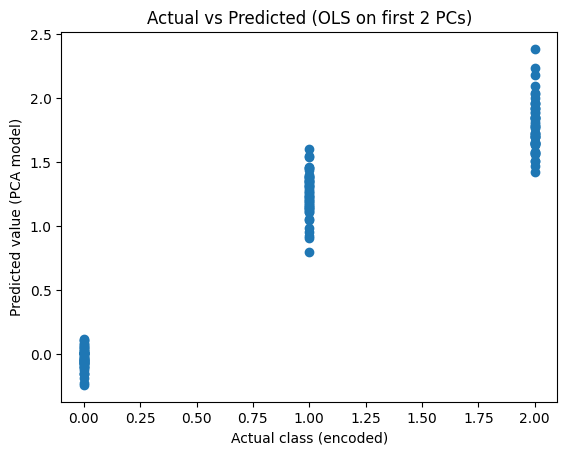

In [23]:
X_pca_reduced = X_pca[:, :k]

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca_reduced, y)

y_pred_pca = pca_model.predict(X_pca_reduced)

mse_pca = np.mean((y - y_pred_pca)**2)
print("PCA-based model MSE:", mse_pca)

plt.scatter(y, y_pred_pca)
plt.xlabel("Actual class (encoded)")
plt.ylabel("Predicted value (PCA model)")
plt.title("Actual vs Predicted (OLS on first 2 PCs)")
plt.show()

After running PCA on the four input features, the first two principal components captured 97.76% of the total variation in the dataset, which means almost all of the meaningful structure in the measurements can be represented in just two dimensions. I then built a linear regression model using only these two components. This PCA-based model had an MSE of 0.0607, which is only slightly higher than the MSE from the full regression model in Problem 5 that used all four original features. The small difference between the two errors shows that reducing the data to the first two principal components preserves nearly all of the information relevant for predicting the class, while simplifying the model input space. Because the species differ primarily in petal size, and PC1 is almost entirely aligned with overall petal size, PCA retains class structure even after dimensionality reduction

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [24]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


After computing the correlation matrix for the four numeric inputs, the largest off-diagonal correlation is between petal_length and petal_width. Those two move together very strongly. Flowers with long petals almost always have wide petals, and short petals tend to be narrow. In the standard iris data this correlation is extremely high (very close to 1). PCA is looking for directions in the data with the largest variance. Because petal_length and petal_width are so strongly positively correlated, most of the variation in the dataset lies along the “overall petal size” direction. That’s why the first principal component explains about 92% of the variance and is mostly a weighted combination of petal length and petal width. In other words, PC1 is basically “big petals vs small petals.” The remaining components (PC2–PC4) pick up the smaller, leftover structure (like sepal size and more subtle shape differences), which is why they each explain only a tiny fraction of the total variance. 

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

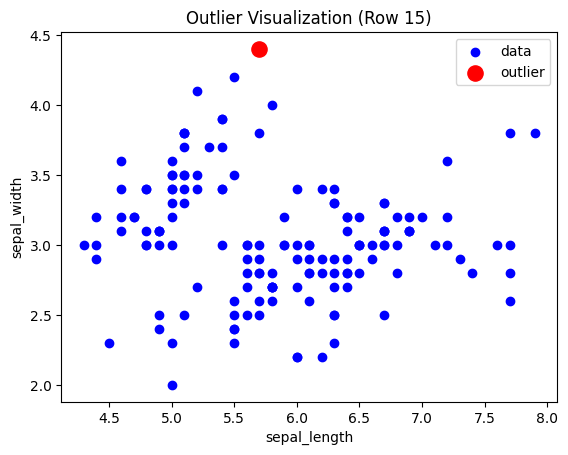

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris = pd.read_csv(url, names=cols)

plt.scatter(iris['sepal_length'], iris['sepal_width'], label="data", color='blue')

plt.scatter(iris.loc[15, 'sepal_length'], iris.loc[15, 'sepal_width'],
            color='red', s=120, label="outlier")

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Outlier Visualization (Row 15)")
plt.legend()
plt.show()

In [26]:
numeric = iris.iloc[:, :4]
z = (numeric - numeric.mean()) / numeric.std()

outlier_mask = (np.abs(z) > 3).any(axis=1)

outlier_rows = iris[outlier_mask]
outlier_rows

,sepal_length,sepal_width,petal_length,petal_width,class
15,5.7,4.4,1.5,0.4,Iris-setosa


I identified an outlier using the z-score method. For each numeric column, I computed how many standard deviations each value is from its column mean, and observations with |z| > 3 were treated as potential outliers. Using this rule, the flower with a sepal width of 4.4 (row 15) stood out as more than three standard deviations above the mean, while all other observations fall in a much tighter range. To visualize this, I plotted sepal width against sepal length and highlighted this point. Nearly all flowers cluster together, but the point at 4.4 sits far above the main cloud, making the outlier visually clear. Although this is a univariate outlier on sepal width, multivariate methods such as Mahalanobis distance would also flag it because it lies far from the joint distribution of the features.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE